# Hierarchical Clustering

This chapter focuses on a popular clustering algorithm - hierarchical clustering - and its implementation in SciPy. In addition to the procedure to perform hierarchical clustering, it attempts to help you answer an important question - how many clusters are present in your data? The chapter concludes with a discussion on the limitations of hierarchical clustering and discusses considerations while using hierarchical clustering.

```python
scipy.cluster.hierarchy.linkage(observations,
method='single',
metric='euclidean',
optimal_ordering=False
)
```
linkage method: helps in computing distance matrix
computes the distances between clusters as we go from N clusters to 1 cluster where N= number of points

**Which method should we use**

method parameter in the linkage method.

* single: decides proximity of clusters based on two closest objects.
* complete: based on two farthest objects
average: based on the arithmetic mean of all objects
centroid: based on the geometric mean of all objects.
median: based on the median of all objects
ward: based difference between the sum of squares of their joint clusters minus the individual summed squares. The ward method focuses on clusters more concentric towards its center.

storing the cluster labels as strings removes the 0th label.

## Hierarchical clustering: ward method

It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

In [1]:
import pandas as pd

In [9]:
#comic_con=pd.read_csv("fifa_18_sample_data.csv")

In [12]:
x_coordinate=[17,
 20,
 35,
 14,
 37,
 33,
 14,
 30,
 35,
 17,
 11,
 21,
 13,
 10,
 81,
 84,
 87,
 83,
 90,
 97,
 94,
 88,
 89,
 93,
 92,
 82,
 81,
 92,
 91,
 22,
 23,
 25,
 25,
 27,
 17,
 17]
y_coordinate= [4,
 6,
 0,
 0,
 4,
 3,
 1,
 6,
 5,
 4,
 6,
 10,
 8,
 10,
 97,
 94,
 99,
 95,
 95,
 97,
 99,
 99,
 94,
 99,
 90,
 98,
 100,
 93,
 98,
 15,
 10,
 0,
 10,
 7,
 17,
 15]

In [13]:
comic_con=pd.DataFrame({'x_coordinate':x_coordinate,'y_coordinate':y_coordinate})

In [14]:
# Import the whiten function
from scipy.cluster.vq import whiten


In [16]:
# Use the whiten() function to standardize the data
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

In [17]:
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


**Instructions**

* Import fcluster and linkage from scipy.cluster.hierarchy.
* Use the ward method in the linkage() function.
* Assign cluster labels by forming 2 flat clusters from distance_matrix.
* Run the plotting code to see the results.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled,cluster_labels
0,17,4,0.509349,0.090010,2
1,20,6,0.599234,0.135015,2
2,35,0,1.048660,0.000000,2
3,14,0,0.419464,0.000000,2
4,37,4,1.108583,0.090010,2


In [31]:
comic_con.dtypes

x_coordinate        int64
y_coordinate        int64
x_scaled          float64
y_scaled          float64
cluster_labels      int32
dtype: object

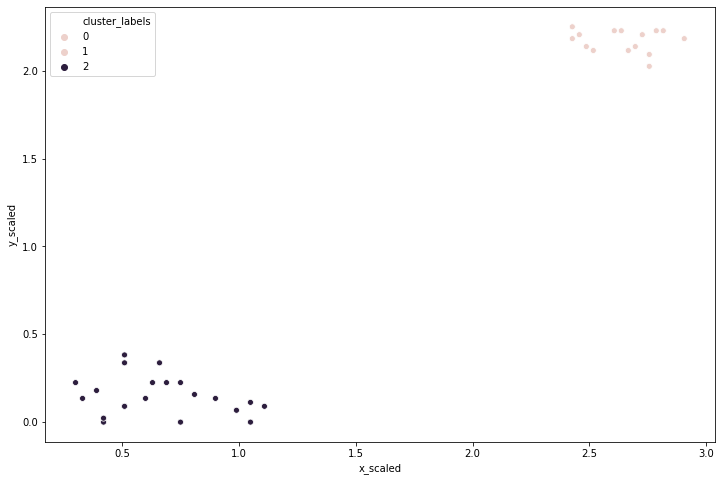

In [30]:
# Plot clusters
fig=plt.figure(figsize=(12,8))
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

 Notice the two clusters correspond to the points of attractions in the figure towards the bottom (a stage) and the top right (an interesting stall).

## Hierarchical clustering: single method

Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

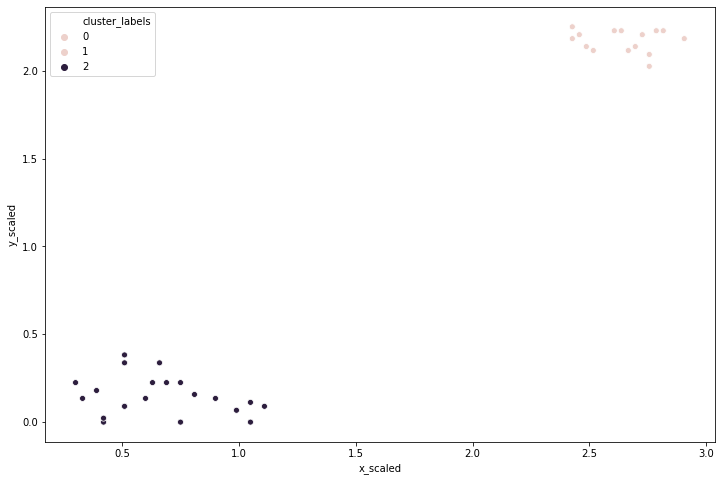

In [33]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

fig=plt.figure(figsize=(12,8))

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

Notice that in this example, the clusters formed are not different from the ones created using the ward method.

## Hierarchical clustering: complete method

For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

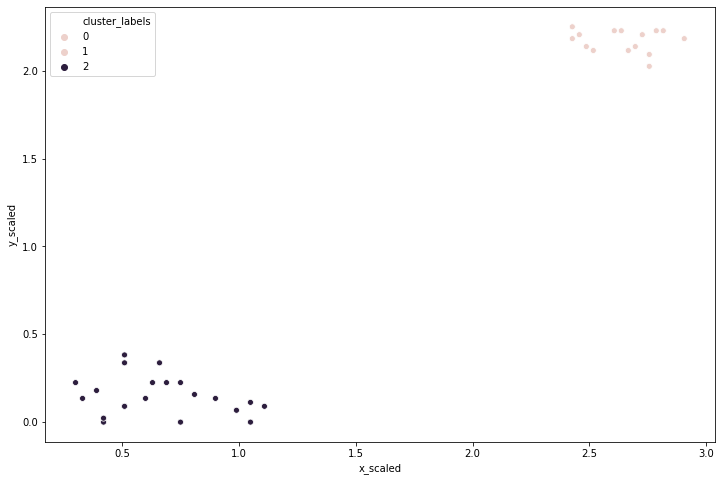

In [34]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled','y_scaled']], method='complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

fig=plt.figure(figsize=(12,8))
# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

Coincidentally, the clusters formed are not different from the ward or single methods. Next, let us learn how to visualize clusters.

## Visualize Clusters

## Visualize clusters with matplotlib

We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

<Figure size 864x576 with 0 Axes>

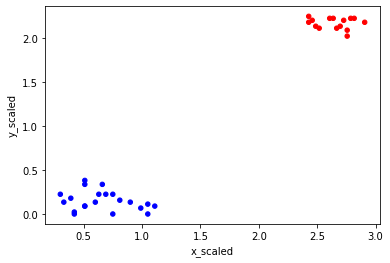

In [35]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

fig=plt.figure(figsize=(12,8))
# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x:colors[x]))
plt.show()

The two different clusters are shown in different colors.

## Visualize clusters with seaborn

Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild hue function for cluster labels.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix

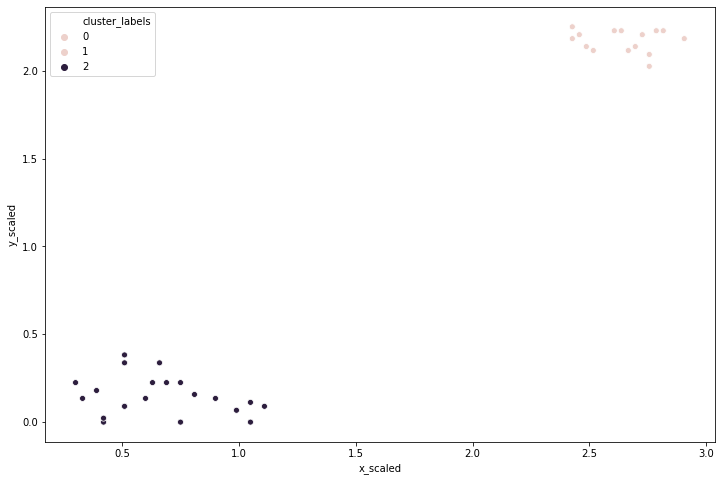

In [36]:
ig=plt.figure(figsize=(12,8))

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

 Notice the legend is automatically shown when using the hue argument.

## How many clusters?

Done using **Dendogram**

![Dendogram](2_1_Number_of_clusters.png)

X axis: represents individual points, like row index
y axis: represents distance or dissimilarity between clusters.

if you draw a horizontal line at any part of the figure, the number of vertical lines it intersects tells you the number of clusters at that stage, and the distance between those vertical lines indicates the inter-cluster distance.

When you move the line below, the number of clusters increases but the inter-cluster distance decreases. This information helps us in deciding the number of clusters.

## Create a dendrogram

Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix

**Instructions**

* Import the dendrogram function from scipy.cluster.hierarchy.
* Create a dendrogram using the linkage object.
* Display the dendrogram using .show() method of the plt object.

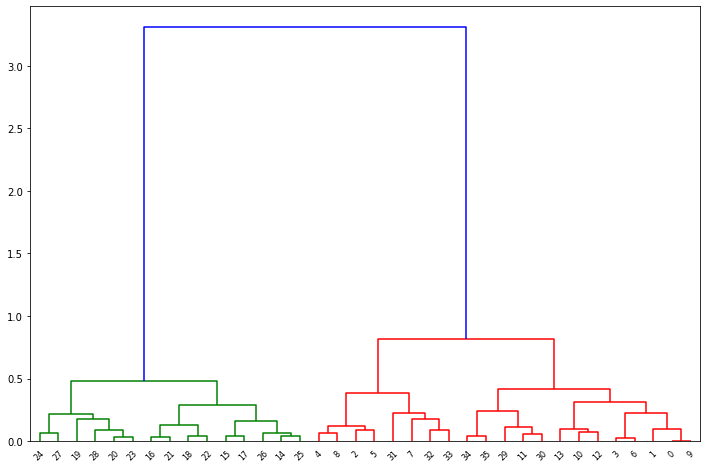

In [37]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

fig=plt.figure(figsize=(12,8))
# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

Notice the significant difference between the inter-cluster distances beyond the top two clusters.

## How many clusters in comic con data?
Given the dendrogram from the last exercise, how many clusters can you see in the data?

A dendrogram is stored in the variable dn. Use plt.show() to display the dendrogram.

Notice that the top two clusters are farthest away from each other.

## Limitations of hierarchical clustering

**Measuring speed in hierarchical clustering**

using timeit module.

generate between 0 and 100 points

In [38]:
import random, timeit
points = 100
df = pd.DataFrame({'x': random.sample(range(0, points), points),
'y': random.sample(range(0, points), points)})
%timeit linkage(df[['x', 'y']], method = 'ward', metric = 'euclidean')

2.65 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


running this code on an Apire 3, the mean time to execute the statement is about 2.65 milliseconds.

Hierarchical clustering is infeasible for huge number of data points.

## FIFA 18: exploring defenders

In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

* *sliding tackle*: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
* *aggression*: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

**This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.**

The following modules are pre-loaded: dendrogram, linkage, fcluster from scipy.cluster.hierarchy, matplotlib.pyplot as plt, seaborn as sns. The data is stored in a Pandas dataframe, fifa.

In [47]:
fifa=pd.read_csv("fifa_18_dataset.csv")
fifa.shape

(17994, 2)

In [48]:
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [49]:
fifa.iloc[4999]

sliding_tackle    71
aggression        57
Name: 4999, dtype: int64

cut the data at index 4999

In [50]:
fifa=fifa[0:5000]

In [55]:
import numpy as np

In [56]:
fifa['scaled_sliding_tackle']= np.round(whiten(fifa['sliding_tackle']),2)
fifa['scaled_aggression']= np.round(whiten(fifa['aggression'],2),2)
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,0.97,3.72
1,26,48,1.09,2.84
2,33,56,1.39,3.31
3,38,78,1.60,4.61
4,11,29,0.46,1.71


* Fit the scaled data in columns scaled_sliding_tackle and scaled_aggression into a hierarchical clustering algorithm. Additionally, you may want to check how long it takes to run the data in the console using the timeit module.

In [63]:
%timeit linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

2.03 s ± 463 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It took  2 seconds to run hierarchical clustering.

In [58]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

* Assign cluster labels to each row in the data using the fcluster() function (use 3 clusters).

In [59]:
# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

* Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.

In [60]:
# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.911454           4.307614
2                            0.864640           2.010895
3                            1.153452           3.694109


* Create a scatter plot using seaborn with the scaled_sliding_tackle attribute on the x-axis and the scaled_aggression attribute on the y-axis. Assign a different color to each cluster.

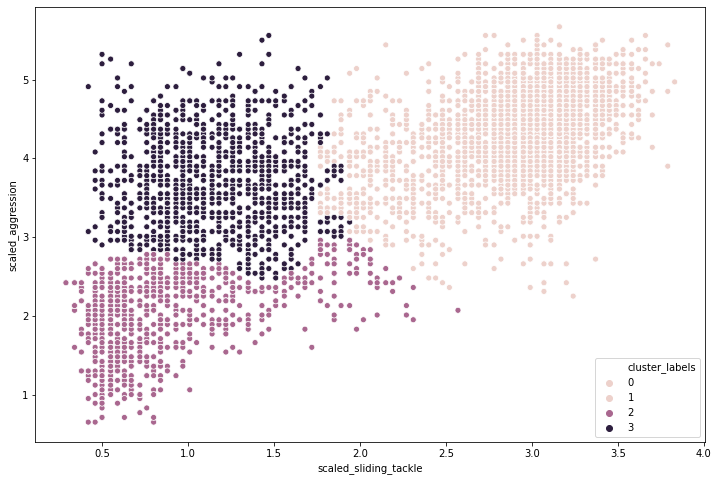

In [62]:
fig=plt.figure(figsize=(12,8))
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

 Notice how long it took to run hierarchical clustering on a few thousand data points. In the next chapter, you will explore clusters in data through k-means clustering.